   > ## Import Key Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline

> ## Import Algorithms:

In [2]:
from sklearn import datasets #Sklearn is a gold mine to do Machine Learning.
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

> ## Import A Data Set & Describe It:

In [3]:
from sklearn.datasets import load_iris
#Here we define which data set.

In [4]:
iris=load_iris()
#Here we install the data set.

In [5]:
iris.keys()#Here we want to find out about the attributes of the data set.

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [6]:
print (iris.DESCR)  #Here we want a description of the data set.

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [7]:
#Here we look at what the data set looks like/what it is made up of...
print (iris.feature_names)
print (iris.data[0:3])
print (iris.target[0:3])


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
[0 0 0]


In [8]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [9]:
print (iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
#We look at the first 5 rows
df_iris = pd.DataFrame(iris.data,columns=iris.feature_names)
df_iris['target'] = pd.Series(iris.target)
y = iris.target 
df_iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Standardise The Data Set: ##

In [11]:
from sklearn.preprocessing import StandardScaler  

In [12]:
#Here we define X so that we can standardise all our X values.
X=iris.data


In [13]:
#We apply the standardise package to our X values.
scaler = StandardScaler()
Xss = scaler.fit_transform(X)
Xss = pd.DataFrame(data=Xss,columns= iris['feature_names'])
Xss.describe()
#We look at what our X values look like post standardisation.
Xss.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


> ## Define The Value We Want To Predict:

In [14]:
#We define what our target/y values are.
y = iris.target

In [15]:
#Here we create a new dataframe with our standardised data and our target variable.
df_iris_standardised=Xss
df_iris_standardised ['target'] = pd.Series(iris.target)
y=iris.target
df_iris_standardised.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0


## Explore The Data Set ##

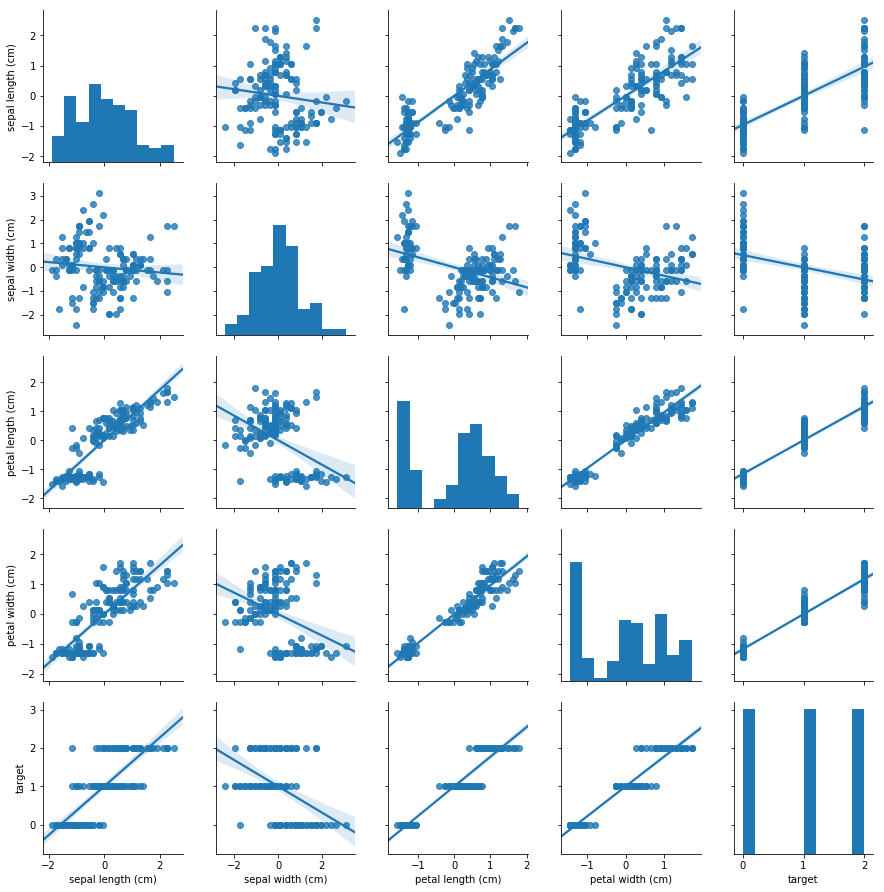

In [16]:
sns.pairplot(df_iris_standardised, kind="reg") 

In [17]:
#Key statistics on non standardised data
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [18]:
#Key statistics on standardised data
df_iris_standardised.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-1.690315e-15,-1.637024e-15,-1.482518e-15,-1.623146e-15,1.000000
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.819232
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00,0.000000
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00,0.000000
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01,1.000000
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01,2.000000
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00,2.000000


> ## Training Phase - Define X and y: 

In [19]:
X=Xss
y=iris.target

## Training Phase - Import Training Libary:

In [20]:
from sklearn.model_selection import train_test_split 

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42) 

In [45]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)



(15, 5)
(135, 5)
(15,)
(135,)


## Define And Install A Specific Model On The Data Set: ##

In [55]:
# We create one instance of the KNN classification model and we call it Knn1.
# We do need to specify the amount of "neighbors" we want to use to help predict 
# which class of iris our test values belong to.
Knn1 = KNeighborsClassifier(n_neighbors=2, weights='uniform')

# We fit our Knn1 model on our training data set.
Knn1.fit(X_train, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

## Evaluate And Interpret The Model - Look At Predictions On The Test Values:

In [56]:
# Predict
pred1 = Knn1.predict(X_test)
print( Knn1.predict(X_test))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2
 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 1 2 0 0 0 1 2 0 2 2 0 1 1
 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0]


## Evaluate And Interpret The Model - Model Accuracy:

In [57]:
#The score is the % of correctly predicted values out of all predictions.
print( Knn1.score(X_test, y_test))

0.9925925925925926


> #### 2) Calcul de la valeur optimale de k:
k=1 apparait risque car on ne base notre prediction que sur une autre seule valeur meme si certes elle est proche
k=nombre d'observations est risque aussi car on encourt le risque d'attribuer la classe qui est majoritaire dans notre ensemble de donnees ce qui ne tient pas compte du concept de distance.

> ## Evaluate And Interpret The Model - Look For The Optimal Value For K:

In [49]:
k_range = range(1, len(X_train))

In [50]:
scores = {}

In [51]:
for k in k_range:
    Knn1 = KNeighborsClassifier(n_neighbors=k, weights='uniform')

    # Fit the model
    Knn1.fit(X_train, y_train)
    
    # Assess
    scores[k] = Knn1.score(X_test, y_test)

scores

{1: 0.9777777777777777,
 2: 0.9925925925925926,
 3: 0.9777777777777777,
 4: 0.9851851851851852,
 5: 0.6444444444444445,
 6: 0.6370370370370371,
 7: 0.6222222222222222,
 8: 0.6222222222222222,
 9: 0.6074074074074074,
 10: 0.5777777777777777,
 11: 0.6222222222222222,
 12: 0.4074074074074074,
 13: 0.43703703703703706,
 14: 0.31851851851851853}

## Evaluate And Interpret The Model - Compare Our Model with A Baseline Model:

#### In classification, a popular baseline model is amodel which predicts the belonging to the majority class. 

In [59]:
#Here we take our y_test values - currently in an array - and we transpose them into a new series.
#This is so we can manipulate the values.
np_array_y_test = y_test
print("NumPy array:")
print(np_array_y_test)
new_series_y_test = pd.Series(np_array_y_test)
print("Converted Pandas series:")
print(new_series_y_test)

NumPy array:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2
 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1
 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0]
Converted Pandas series:
0      1
1      0
2      2
3      1
4      1
      ..
130    2
131    2
132    0
133    2
134    0
Length: 135, dtype: int32


In [60]:
#Here we want to know what the majority class is on our y_test data set: 0? 1? 2?
#We observe it is 0 i.e the setosa class.
new_series_y_test.value_counts()

0    48
1    44
2    43
dtype: int64

In [61]:
#Here we divide the number of observations belonging to the majority class by the overall number of observations.
#And that's how we obtain the baseline model score which is 38%.
#Our model has a much higher score.
baseline=new_series_y_test.value_counts().head(1)/len(new_series_y_test)
baseline

0    0.355556
dtype: float64